In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
type(data)

dict

In [4]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12283,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.990622e+07,1.990622e+07,False,NaN,1,NaN,NaN,None,2025-08-14T09:38:00.000Z,121706.082860,9.795033e+10,42.2660,-0.089548,1.450685,5.861533,4.008785,15.876122,17.420215,2.422708e+12,58.5371,2.555828e+12,None,2025-08-14T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-14 12:40:33.295766
1,1027,Ethereum,ETH,ethereum,10439,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207083e+08,1.207083e+08,True,NaN,2,NaN,NaN,None,2025-08-14T09:38:00.000Z,4757.987980,6.047111e+10,3.0084,0.576307,2.348397,27.720833,59.545597,89.276250,82.442874,5.743287e+11,13.8754,5.743287e+11,None,2025-08-14T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-14 12:40:33.295766
2,52,XRP,XRP,xrp,1674,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.930839e+10,9.998588e+10,False,NaN,3,NaN,NaN,None,2025-08-14T09:38:00.000Z,3.236600,1.012380e+10,12.2077,-0.029523,-1.095807,7.787561,12.064518,49.954826,34.566752,1.919575e+11,4.6376,3.236600e+11,None,2025-08-14T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-14 12:40:33.295766
3,825,Tether USDt,USDT,tether,141349,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.650245e+11,1.677492e+11,True,NaN,4,NaN,NaN,None,2025-08-14T09:37:00.000Z,1.000325,1.825637e+11,11.9242,0.000010,0.093773,0.025660,0.046563,-0.024883,0.018060,1.650780e+11,3.9882,1.678036e+11,None,2025-08-14T09:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-14 12:40:33.295766
4,1839,BNB,BNB,bnb,2661,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.392878e+08,1.392878e+08,False,NaN,5,NaN,NaN,None,2025-08-14T09:38:00.000Z,865.782328,3.405391e+09,2.7030,0.908668,0.956763,13.047469,27.512208,33.916158,32.446011,1.205929e+11,2.9137,1.205929e+11,None,2025-08-14T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-14 12:40:33.295766
5,5426,Solana,SOL,solana,969,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.396649e+08,6.073305e+08,True,NaN,6,5.252369e+08,1.074757e+11,None,2025-08-14T09:38:00.000Z,204.623250,1.244779e+10,1.9376,0.471131,1.869759,20.754163,28.031691,41.298884,19.498990,1.104280e+11,2.6679,1.242739e+11,None,2025-08-14T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-14 12:40:33.295766
6,3408,USDC,USDC,usd-coin,30503,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.712228e+10,6.712228e+10,False,NaN,7,6.090122e+10,6.088395e+10,None,2025-08-14T09:37:00.000Z,0.999716,2.547188e+10,20.1823,-0.010787,0.032724,-0.009154,-0.016347,-0.049072,-0.020503,6.710325e+10,1.6212,6.710325e+10,None,2025-08-14T09:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-14 12:40:33.295766
7,74,Dogecoin,DOGE,dogecoin,1270,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.505122e+11,1.505122e+11,True,NaN,8,NaN,NaN,None,2025-08-14T09:38:00.000Z,0.241840,4.032017e+09,0.1055,-0.447564,-2.120243,17.458082,26.140862,39.062877,6.694161,3.639996e+10,0.8794,3.639996e+10,None,2025-08-14T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-14 12:40:33.295766
8,2010,Cardano,ADA,cardano,1562,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, sma

In [12]:
def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df2.append(df2)

In [13]:
import os
from time import time
from time import sleep
import pandas as pd  # Make sure pandas is imported

# Assuming api_runner() is defined elsewhere and uses DataFrame.append()
# Here's how you might modify it if you have access to the function:

def api_runner():
    # This is a placeholder for your actual api_runner function
    # Replace DataFrame.append() with pd.concat() in your actual function
    # For example, if you had:
    # df = df.append(new_data)
    # Change it to:
    # df = pd.concat([df, new_data], ignore_index=True)
    pass  # Your actual implementation here

# Main loop
for i in range(333):
    api_runner()
    print('API Runner Completed Successfully')
    sleep(60)
exit()

API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully


KeyboardInterrupt: 

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12283,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.990622e+07,1.990622e+07,False,NaN,1,NaN,NaN,None,2025-08-14T09:38:00.000Z,121706.082860,9.795033e+10,42.2660,-0.089548,1.450685,5.861533,4.008785,15.876122,17.420215,2.422708e+12,58.5371,2.555828e+12,None,2025-08-14T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-14 12:40:33.295766
1,1027,Ethereum,ETH,ethereum,10439,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207083e+08,1.207083e+08,True,NaN,2,NaN,NaN,None,2025-08-14T09:38:00.000Z,4757.987980,6.047111e+10,3.0084,0.576307,2.348397,27.720833,59.545597,89.276250,82.442874,5.743287e+11,13.8754,5.743287e+11,None,2025-08-14T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-14 12:40:33.295766
2,52,XRP,XRP,xrp,1674,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.930839e+10,9.998588e+10,False,NaN,3,NaN,NaN,None,2025-08-14T09:38:00.000Z,3.236600,1.012380e+10,12.2077,-0.029523,-1.095807,7.787561,12.064518,49.954826,34.566752,1.919575e+11,4.6376,3.236600e+11,None,2025-08-14T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-14 12:40:33.295766
3,825,Tether USDt,USDT,tether,141349,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.650245e+11,1.677492e+11,True,NaN,4,NaN,NaN,None,2025-08-14T09:37:00.000Z,1.000325,1.825637e+11,11.9242,0.000010,0.093773,0.025660,0.046563,-0.024883,0.018060,1.650780e+11,3.9882,1.678036e+11,None,2025-08-14T09:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-14 12:40:33.295766
4,1839,BNB,BNB,bnb,2661,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.392878e+08,1.392878e+08,False,NaN,5,NaN,NaN,None,2025-08-14T09:38:00.000Z,865.782328,3.405391e+09,2.7030,0.908668,0.956763,13.047469,27.512208,33.916158,32.446011,1.205929e+11,2.9137,1.205929e+11,None,2025-08-14T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-14 12:40:33.295766
5,5426,Solana,SOL,solana,969,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.396649e+08,6.073305e+08,True,NaN,6,5.252369e+08,1.074757e+11,None,2025-08-14T09:38:00.000Z,204.623250,1.244779e+10,1.9376,0.471131,1.869759,20.754163,28.031691,41.298884,19.498990,1.104280e+11,2.6679,1.242739e+11,None,2025-08-14T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-14 12:40:33.295766
6,3408,USDC,USDC,usd-coin,30503,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.712228e+10,6.712228e+10,False,NaN,7,6.090122e+10,6.088395e+10,None,2025-08-14T09:37:00.000Z,0.999716,2.547188e+10,20.1823,-0.010787,0.032724,-0.009154,-0.016347,-0.049072,-0.020503,6.710325e+10,1.6212,6.710325e+10,None,2025-08-14T09:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-14 12:40:33.295766
7,74,Dogecoin,DOGE,dogecoin,1270,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.505122e+11,1.505122e+11,True,NaN,8,NaN,NaN,None,2025-08-14T09:38:00.000Z,0.241840,4.032017e+09,0.1055,-0.447564,-2.120243,17.458082,26.140862,39.062877,6.694161,3.639996e+10,0.8794,3.639996e+10,None,2025-08-14T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-14 12:40:33.295766
8,2010,Cardano,ADA,cardano,1562,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, sma

In [15]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [16]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12283,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19906221.00000,19906221.00000,False,NaN,1,NaN,NaN,None,2025-08-14T09:38:00.000Z,121706.08286,97950331516.04201,42.26600,-0.08955,1.45069,5.86153,4.00879,15.87612,17.42021,2422708182446.76074,58.53710,2555827740050.81006,None,2025-08-14T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-14 12:40:33.295766
1,1027,Ethereum,ETH,ethereum,10439,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120708311.76419,120708311.76419,True,NaN,2,NaN,NaN,None,2025-08-14T09:38:00.000Z,4757.98798,60471106940.10176,3.00840,0.57631,2.34840,27.72083,59.54560,89.27625,82.44287,574328696462.25635,13.87540,574328696462.26001,None,2025-08-14T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-14 12:40:33.295766
2,52,XRP,XRP,xrp,1674,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59308385925.00000,99985880506.00000,False,NaN,3,NaN,NaN,None,2025-08-14T09:38:00.000Z,3.23660,10123803461.28114,12.20770,-0.02952,-1.09581,7.78756,12.06452,49.95483,34.56675,191957504126.19778,4.63760,323659970057.09003,None,2025-08-14T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-14 12:40:33.295766
3,825,Tether USDt,USDT,tether,141349,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,165024459754.79034,167749161112.30881,True,NaN,4,NaN,NaN,None,2025-08-14T09:37:00.000Z,1.00032,182563670739.01083,11.92420,0.00001,0.09377,0.02566,0.04656,-0.02488,0.01806,165078031248.71994,3.98820,167803617119.48999,None,2025-08-14T09:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-14 12:40:33.295766
4,1839,BNB,BNB,bnb,2661,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139287799.68000,139287799.68000,False,NaN,5,NaN,NaN,None,2025-08-14T09:38:00.000Z,865.78233,3405390606.03474,2.70300,0.90867,0.95676,13.04747,27.51221,33.91616,32.44601,120592915521.45177,2.91370,120592915521.45000,None,2025-08-14T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-14 12:40:33.295766
5,5426,Solana,SOL,solana,969,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,539664939.75189,607330483.26000,True,NaN,6,525236893.30000,107475679917.23003,None,2025-08-14T09:38:00.000Z,204.62325,12447789611.61589,1.93760,0.47113,1.86976,20.75416,28.03169,41.29888,19.49899,110427993667.60518,2.66790,124273937066.23000,None,2025-08-14T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-14 12:40:33.295766
6,3408,USDC,USDC,usd-coin,30503,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,67122280254.95499,67122280254.95499,False,NaN,7,60901219650.23000,60883951258.69903,None,2025-08-14T09:37:00.000Z,0.99972,25471882370.36995,20.18230,-0.01079,0.03272,-0.00915,-0.01635,-0.04907,-0.02050,67103247896.94063,1.62120,67103247896.94000,None,2025-08-14T09:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-14 12:40:33.295766
7,74,Dogecoin,DOGE,dogecoin,1270,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,150512246383.70514,150512246383.70514,True,NaN,8,NaN,NaN,None,2025-08-14T09:38:00.000Z,0.24184,4032016888.52520,0.10550,-0.44756,-2.12024,17.45808,26.14086,39.06288,6.69416,36399955011.90393,0.

In [17]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.08955,1.45069,5.86153,4.00879,15.87612,17.42021
Ethereum,0.57631,2.34840,27.72083,59.54560,89.27625,82.44287
XRP,-0.02952,-1.09581,7.78756,12.06452,49.95483,34.56675
Tether USDt,0.00001,0.09377,0.02566,0.04656,-0.02488,0.01806
BNB,0.90867,0.95676,13.04747,27.51221,33.91616,32.44601
Solana,0.47113,1.86976,20.75416,28.03169,41.29888,19.49899
USDC,-0.01079,0.03272,-0.00915,-0.01635,-0.04907,-0.02050
Dogecoin,-0.44756,-2.12024,17.45808,26.14086,39.06288,6.69416
Cardano,-0.34115,12.97422,32.82734,34.45113,58.10274,27.02869


In [18]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h    -0.08955
              quote.USD.percent_change_24h    1.45069
              quote.USD.percent_change_7d     5.86153
              quote.USD.percent_change_30d    4.00879
              quote.USD.percent_change_60d   15.87612
              quote.USD.percent_change_90d   17.42021
Ethereum      quote.USD.percent_change_1h     0.57631
              quote.USD.percent_change_24h    2.34840
              quote.USD.percent_change_7d    27.72083
              quote.USD.percent_change_30d   59.54560
              quote.USD.percent_change_60d   89.27625
              quote.USD.percent_change_90d   82.44287
XRP           quote.USD.percent_change_1h    -0.02952
              quote.USD.percent_change_24h   -1.09581
              quote.USD.percent_change_7d     7.78756
              quote.USD.percent_change_30d   12.06452
              quote.USD.percent_change_60d   49.95483
              quote.USD.percent_change_

In [19]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin      quote.USD.percent_change_1h  -0.08955
             quote.USD.percent_change_24h  1.45069
             quote.USD.percent_change_7d   5.86153
             quote.USD.percent_change_30d  4.00879
             quote.USD.percent_change_60d 15.87612
             quote.USD.percent_change_90d 17.42021
Ethereum     quote.USD.percent_change_1h   0.57631
             quote.USD.percent_change_24h  2.34840
             quote.USD.percent_change_7d  27.72083
             quote.USD.percent_change_30d 59.54560
             quote.USD.percent_change_60d 89.27625
             quote.USD.percent_change_90d 82.44287
XRP          quote.USD.percent_change_1h  -0.02952
             quote.USD.percent_change_24h -1.09581
             quote.USD.percent_change_7d   7.78756
             quote.USD.percent_change_30d 12.06452
             quote.USD.percent_change_60d 49.95483
             quote.USD.percent_change_90d 34.56675
Tether USDt  quote.USD.percent_change_1h   0.00001
             quote.USD.percent_change_24h  0.09377
             quote.USD.percent_change_7d   0.02566
             quote.USD.percent_change_30d  0.04656
             quote.USD.percent_change_60d -0.02488
             quote.USD.percent_change_90d  0.01806
BNB          quote.USD.percent_change_1h   0.90867
             quote.USD.percent_change_24h  0.95676
             quote.USD.percent_change_7d  13.04747
             quote.USD.percent_change_30d 27.51221
             quote.USD.percent_change_60d 33.91616
             quote.USD.percent_change_90d 32.44601
Solana       quote.USD.percent_change_1h   0.47113
             quote.USD.percent_change_24h  1.86976
             quote.USD.percent_change_7d  20.75416
             quote.USD.percent_change_30d 28.03169
             quote.USD.percent_change_60d 41.29888
             quote.USD.percent_change_90d 19.49899
USDC         quote.USD.percent_change_1h  -0.01079
             quote.USD.percent_change_24h  0.03272
             quote.USD.percent_change_7d  -0.00915
             quote.USD.percent_change_30d -0.01635
             quote.USD.percent_change_60d -0.04907
             quote.USD.percent_change_90d -0.02050
Dogecoin     quote.USD.percent_change_1h  -0.44756
             quote.USD.percent_change_24h -2.12024
             quote.USD.percent_change_7d  17.45808
             quote.USD.percent_change_30d 26.14086
             quote.USD.percent_change_60d 39.06288
             quote.USD.percent_change_90d  6.69416
Cardano      quote.USD.percent_change_1h  -0.34115
             quote.USD.percent_change_24h 12.97422
             quote.USD.percent_change_7d  32.82734
             quote.USD.percent_change_30d 34.45113
             quote.USD.percent_change_60d 58.10274
             quote.USD.percent_change_90d 27.02869
TRON         quote.USD.percent_change_1h   0.48565
             quote.USD.percent_change_24h  2.93259
             quote.USD.percent_change_7d   8.40922
             quote.USD.percent_change_30d 23.61654
             quote.USD.percent_change_60d 35.23247
             quote.USD.percent_change_90d 34.40570
Chainlink    quote.USD.percent_change_1h   1.41547
             quote.USD.percent_change_24h  0.31832
             quote.USD.percent_change_7d  40.30353
             quote.USD.percent_change_30d 52.73808
             quote.USD.percent_change_60d 81.20847
             quote.USD.percent_change_90d 44.82051
Hyperliquid  quote.USD.percent_change_1h   0.30697
             quote.USD.percent_change_24h  3.58624
             quote.USD.percent_change_7d  23.49011
             quote.USD.percent_change_30d -1.14794
             quote.USD.percent_change_60d 17.11518
             quote.USD.percent_change_90d 75.21834
Stellar      quote.USD.percent_change_1h  -0.23372
             quote.USD.percent_change_24h -0.94963
             quote.USD.percent_change_7d  11.12568
             quote.USD.percent_change_30d -4.26752
             quote.USD.percent_change_60d 74.92879
             qu

In [21]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.08955
1,Bitcoin,quote.USD.percent_change_24h,1.45069
2,Bitcoin,quote.USD.percent_change_7d,5.86153
3,Bitcoin,quote.USD.percent_change_30d,4.00879
4,Bitcoin,quote.USD.percent_change_60d,15.87612
5,Bitcoin,quote.USD.percent_change_90d,17.42021
6,Ethereum,quote.USD.percent_change_1h,0.57631
7,Ethereum,quote.USD.percent_change_24h,2.34840
8,Ethereum,quote.USD.percent_change_7d,27.72083
9,Ethereum,quote.USD.percent_change_30d,59.54560


In [22]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.08955
1,Bitcoin,quote.USD.percent_change_24h,1.45069
2,Bitcoin,quote.USD.percent_change_7d,5.86153
3,Bitcoin,quote.USD.percent_change_30d,4.00879
4,Bitcoin,quote.USD.percent_change_60d,15.87612
5,Bitcoin,quote.USD.percent_change_90d,17.42021
6,Ethereum,quote.USD.percent_change_1h,0.57631
7,Ethereum,quote.USD.percent_change_24h,2.34840
8,Ethereum,quote.USD.percent_change_7d,27.72083
9,Ethereum,quote.USD.percent_change_30d,59.54560


In [27]:
df7['percent_change'] = df7['percent_change'].replace([
    'quote.USD.percent_change_1h',
    'quote.USD.percent_change_24h',
    'quote.USD.percent_change_7d',
    'quote.USD.percent_change_30d',
    'quote.USD.percent_change_60d',
    'quote.USD.percent_change_90d'
], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.08955
1,Bitcoin,24h,1.45069
2,Bitcoin,7d,5.86153
3,Bitcoin,30d,4.00879
4,Bitcoin,60d,15.87612
5,Bitcoin,90d,17.42021
6,Ethereum,1h,0.57631
7,Ethereum,24h,2.34840
8,Ethereum,7d,27.72083
9,Ethereum,30d,59.54560


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

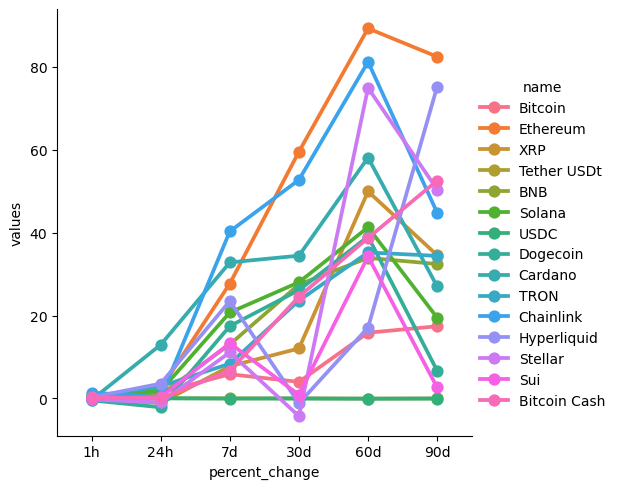

In [28]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [29]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,121706.08286,2025-08-14 12:40:33.295766
